In [2]:
import tensorflow as tf
import numpy as np
import pickle
import matplotlib.pyplot as plt
import time
import os
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import utils

<h1>Load training, validation, testing set from your preprocessed files</h1>

In [3]:
#Step 10: define a function to yield mini_batch
def mini_batch(features,labels,mini_batch_size):
    """
    Args:
        features: features for one batch
        labels: labels for one batch
        mini_batch_size: the mini-batch size you want to use.
    Hint: Use "yield" to generate mini-batch features and labels
    """
    #batch size is number of samples in each iteration 
    features,labels=utils.shuffle(features,labels)
    data_size=np.shape(labels)[0]
    its=data_size//mini_batch_size
    i=0
    j=mini_batch_size
    k=0
    while k != its:
        mb_features=features[i:j]
        mb_labels=labels[i:j]
        i+=mini_batch_size
        j+=mini_batch_size
        k+=1
        yield mb_features, mb_labels
        

#Step 11: define a function to load preprocessed training batch, the function will call the mini_batch() function
def load_preprocessed_training_batch(mini_batch_size):
    """
    Args:
        batch_id: the specific training batch you want to load
        mini_batch_size: the number of examples you want to process for one update
    Return:
        mini_batch(features,labels, mini_batch_size)
    """
    #directory="C:\\Users\\ebish\\PracticalIntroductionNN"
    filename='x_train_cd.pkl'
    #path_features =os.path.join(directory,filename)
    file_labels='y_train_cd.pkl'
    #path_labels=os.path.join(directory,file_labels)
#     features= pickle.load(open(path_features,'rb'))
#     labels= pickle.load(open(path_labels,'rb'))
    features= pickle.load(open(filename,'rb'))
    labels= pickle.load(open(file_labels,'rb'))
    return mini_batch(features,labels,mini_batch_size)

#Step 12: load preprocessed validation batch
def load_preprocessed_validation_batch():
    #directory="C:\\Users\\ebish\\PracticalIntroductionNN"
    file_name ='x_val_cd.pkl' 
    #path_features =os.path.join(directory,file_name)
    file_labels='y_val_cd.pkl'
    #path_labels=os.path.join(directory,file_labels)
#     features = pickle.load(open(path_features,'rb'))
#     labels=pickle.load(open(path_labels,'rb'))
    features = pickle.load(open(file_name,'rb'))
    labels=pickle.load(open(file_labels,'rb'))
    return features,labels

#Step 13: load preprocessed test batch
def load_preprocessed_test_batch(test_mini_batch_size):
    #directory="C:\\Users\\ebish\\PracticalIntroductionNN"
    file_name = 'test_data.pkl'
    file_labels='y_test_cd.pkl'
    #path =os.path.join(directory,file_name)
    features =pickle.load(open(file_name,'rb'))
    labels=pickle.load(open(file_labels,'rb'))
    return mini_batch(features,labels,test_mini_batch_size)


<h1>Define hyperparameter</h1>

In [4]:
#learning rate
lr = 0.001
#number of traning steps
num_steps =5
#number of batch_size
batch_size = 256

#network parameters

num_input = 227
num_classes = 2

<h1>Placeholder</h1>

In [5]:
tf.reset_default_graph()

In [6]:
X = tf.placeholder(tf.float32,[None,num_input,num_input,3],name='X')
Y = tf.placeholder(tf.int32,[None,num_classes],name='Y')

AlexNet Architecture Input: 277 by 277

Convolutional Layer 1: Filers nc=96 ,filter size f=11  , Padding p=0 , stride s=4  
Thus output is (n^(l-1)+2p-f)/s+1 = (277-11)/4+1 = 55 by 55 by 96

Maxpooling Layer 1: # of filter nc=96, filter size f=3, padding p=0, stride s=2 The output is (27-3)/2+1=27. So 27 by 27 by 96

Convolutional Layer 2: Filers nc=256 ,filter size f=5  , Padding p=2 , stride s=1  
Thus output is (n^(l-1)+2p-f)/s+1 = (27+4-5)/1+1 = 27 by 27 by 256


Maxpooling Layer 2: # of filter nc=256, filter size f=3, padding p=0, stride s=2 The output is (27-3)/2+1=13. So 13 by 13 by 256


Convolutional Layer 3: Filers nc=384, filter size f=3, Padding p=1 , stride s=1  
Thus output is (n^(l-1)+2p-f)/s+1 = (13+2-3)/1+1 = 13 by 13 by 384


Convolutional Layer 4: Filers nc=384 ,filter size f=3  , Padding p=1 , stride s=1  
Thus output is (n^(l-1)+2p-f)/s+1 = (13-3+2)/1+1 = 13 by 13 by 384


Convolutional Layer 5: Filers nc=256 ,filter size f=3  , Padding p=1 , stride s=1  
Thus output is (n^(l-1)+2p-f)/s+1 = (13-3+2)/1+1 = 13 by 13 by 256

Maxpooling Layer 3: # of filter nc=256, filter size f=3, padding p=0, stride s=2 The output is (13-3)/2+1=6. So 6 by 6 by 256

Fully Connected Layer 6: We flatten it to be 6*6*256=9216

Fully Connected Layer 7 4096 nodes

Fully Connected Layer 8 4096 nodes

Softmax 2 since we have two classes: Cats and Dogs

In [7]:
# X = tf.placeholder(tf.float32,[None,num_input,num_input,3],name='X')
# Y = tf.placeholder(tf.int32,[None,num_classes],name='Y')

# #each filter: f x f x nc(l-1)
# #weights: f x f x nc(l-1) x nc(l)
# #bias: nc(l)

# #Layers weight & bias
# weights = {
#     'W1_conv1': tf.Variable(tf.random_normal([11,11,3,96]),name='W1_conv1'),
#     'W2_conv2': tf.Variable(tf.random_normal([5,5,96,256]),name='W2_conv2'),
#     'W3_conv3': tf.Variable(tf.random_normal([3,3,256,384]),name='W3_conv3'),
#     'W4_conv4': tf.Variable(tf.random_normal([3,3,384,384]),name='W4_conv4'),
#     'W5_conv5': tf.Variable(tf.random_normal([3,3,384,256]),name='W5_conv5'),
#     'W6': tf.Variable(tf.random_normal([9216,9216]),name='W6'),
#     'W7': tf.Variable(tf.random_normal([9216, 4096]),name='W7'),
#     'W8': tf.Variable(tf.random_normal([4096, 4096]),name='W8'),
#     'Wout': tf.Variable(tf.random_normal([4096, num_classes]),name='Wout')
# }

# biases = {
#     'b1_conv1': tf.Variable(tf.zeros(shape=[96]),name='b1_conv1'),
#     'b2_conv2': tf.Variable(tf.zeros(shape=[256]),name='b2_conv2'),
#     'b3_conv3': tf.Variable(tf.zeros(shape=[384]),name='b3_conv3'),
#     'b4_conv4': tf.Variable(tf.zeros(shape=[384]),name='b4_conv4'),
#     'b5_conv5': tf.Variable(tf.zeros(shape=[256]),name='b5_conv5'),

#     'b6': tf.Variable(tf.zeros(shape=[9216]),name='b6'),
#     'b7': tf.Variable(tf.zeros(shape=[4096]),name='b7'),
#     'b8': tf.Variable(tf.zeros(shape=[4096]),name='b8'),
#     'bout': tf.Variable(tf.zeros(shape=[num_classes]),name='bout')
# } 

<h1>AlexNet</h1>

In [8]:
# #define a neural net model
# def alexnet(x):
#     conv_1_out = tf.nn.relu(tf.add(tf.nn.conv2d(x,weights['W1_conv1'],strides=[1,4,4,1],padding='VALID'),biases['b1_conv1']))
#     pool_1_out=tf.nn.max_pool(conv_1_out,ksize=[1,3,3,1], strides=[1,2,2,1],padding='VALID')
#     conv_2_out = tf.nn.relu(tf.add(tf.nn.conv2d(pool_1_out,weights['W2_conv2'],strides=[1,1,1,1],padding='SAME'),biases['b2_conv2']))
#     pool_2_out=tf.nn.max_pool(conv_2_out,ksize=[1,3,3,1], strides=[1,2,2,1],padding='VALID')
#     conv_3_out = tf.nn.relu(tf.add(tf.nn.conv2d(pool_2_out,weights['W3_conv3'],strides=[1,1,1,1],padding='SAME'),biases['b3_conv3']))
#     conv_4_out = tf.nn.relu(tf.add(tf.nn.conv2d(conv_3_out,weights['W4_conv4'],strides=[1,1,1,1],padding='SAME'),biases['b4_conv4']))
#     conv_5_out = tf.nn.relu(tf.add(tf.nn.conv2d(conv_4_out,weights['W5_conv5'],strides=[1,1,1,1],padding='SAME'),biases['b5_conv5']))
#     pool_3_out=tf.nn.max_pool(conv_5_out,ksize=[1,3,3,1], strides=[1,2,2,1],padding='VALID')

#     pool_3_flatten=tf.reshape(pool_3_out,[-1,6*6*256])
#     layer_6_out = tf.nn.relu(tf.add(tf.matmul(pool_3_flatten,weights['W6']),biases['b6']))
#     layer_7_out = tf.nn.relu(tf.add(tf.matmul(layer_6_out,weights['W7']),biases['b7']))
#     layer_8_out = tf.nn.relu(tf.add(tf.matmul(layer_7_out,weights['W8']),biases['b8']))

#     out = tf.add(tf.matmul(layer_8_out,weights['Wout']),biases['bout'])
#     return out

def alexnet(x):
    conv_1_out=tf.layers.conv2d(x,filters=96, kernel_size=11, strides=4, padding='valid', activation='relu')
    pool_1_out=tf.layers.max_pooling2d(conv_1_out,pool_size=3,strides=2,padding='valid')    
    
    conv_2_out=tf.layers.conv2d(pool_1_out,filters=256,kernel_size=5, strides=1,padding='same', activation='relu')
    pool_2_out=tf.layers.max_pooling2d(conv_2_out,pool_size=3,strides=2,padding='valid')
    
    conv_3_out=tf.layers.conv2d(pool_2_out,filters=384,kernel_size=3,strides=1,padding='same',activation='relu')
    conv_4_out=tf.layers.conv2d(conv_3_out,filters=384,kernel_size=3,strides=1,padding='same',activation='relu')
    conv_5_out=tf.layers.conv2d(conv_4_out,filters=256,kernel_size=3,strides=1,padding='same',activation='relu')
    
    pool_3_out=tf.layers.max_pooling2d(conv_5_out,pool_size=3,strides=2,padding='valid')
    pool_3_flatten=tf.reshape(pool_3_out,[-1,6*6*256])
    #conv_6_out=tf.layers.conv2d(pool_3_out,filters=4096,kernel_size=6,strides=1,activation='relu')
    #flatten=tf.layers.flatten(conv_6_out)
    layer_6_out=tf.layers.dense(pool_3_flatten,units=9216,activation='relu')
    #layer_7_out=tf.layers.dense(flatten,units=4096,activation='relu')

    layer_7_out=tf.layers.dense(layer_6_out,units=4096,activation='relu')
    layer_8_out=tf.layers.dense(layer_7_out,units=4096,activation='relu')
    
    out=tf.layers.dense(layer_8_out,units=2)
    return out
    

<h1>Cost and Optimization</h1>

In [11]:
#predicted labels
logits = alexnet(X)

#define loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y),name='loss')
#define optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss)
prob=tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y,name='prob')


#compare the predicted labels with true labels
correct_pred = tf.equal(tf.argmax(logits,1),tf.argmax(Y,1))

#compute the accuracy by taking average
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')



<h1>Training and validation</h1>
<h2>Train your model only 10 epochs</h2>
<p style="font-size:20px">1. Print out training accuracy and validation accuracy each training epoch</p>
<p style="font-size:20px">2. Print out training time each training epoch</p>
<p style="font-size:20px">3. Your goal is to reach 85% validation accuracy in 10 training epochs. If you reach that, you can perform testing, print out your test accuracy. Plot out the ten images with title that contains the probability of the labeled class.</p>

In [ ]:
#Initialize the variables

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(10):
        #fetch batch
        acc=[]
        st=time.time()
        #for j in range(1,6):
        for (a,b) in load_preprocessed_training_batch(250):
            batch_x, batch_y = a, b
                #run optimization
            sess.run(train_op, feed_dict={X:batch_x, Y:batch_y})  
            acc.append( sess.run(accuracy,feed_dict={X:batch_x, Y:batch_y}))
        mid=time.time()
        print("Epoch "+str(i)+", Time:{} ".format(mid-st)+", Accuracy= {:.3f}".format(np.average(acc)))
        
        batch_a,batch_b=load_preprocessed_validation_batch()
        #batch_a=load_cifar_template1.features_reshape(batch_a)
        val=sess.run(accuracy, feed_dict={X:batch_a, Y:batch_b})
        print("Validation Accuracy:",val)
        if val>=.85:
            break
    
    print("Training finished!")
    testing=[]
    for (a,b) in load_preprocessed_test_batch(250):
        batch_x, batch_y = a, b
        testing.append(sess.run(accuracy, feed_dict={X:batch_a, Y:batch_b}))
    print("Testing Accuracy: {:.3f}".format(np.average(testing)))
    #testing_accuracy.append(tes)

Epoch 0, Time:166.03104043006897 , Accuracy= 0.503
Validation Accuracy: 0.534
Epoch 1, Time:165.86009645462036 , Accuracy= 0.501
Validation Accuracy: 0.534
Epoch 2, Time:164.94131803512573 , Accuracy= 0.506
Validation Accuracy: 0.466
Epoch 3, Time:164.57556986808777 , Accuracy= 0.505
Validation Accuracy: 0.534
Epoch 4, Time:164.59844970703125 , Accuracy= 0.510
Validation Accuracy: 0.534
Epoch 5, Time:164.27438163757324 , Accuracy= 0.506
Validation Accuracy: 0.534
Epoch 6, Time:165.02875304222107 , Accuracy= 0.510
Validation Accuracy: 0.534
Epoch 7, Time:164.19275164604187 , Accuracy= 0.502
Validation Accuracy: 0.466
Epoch 8, Time:164.62485885620117 , Accuracy= 0.506
Validation Accuracy: 0.534


In [12]:
#Initialize the variables
#learning rate=.001
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(1):
        #fetch batch
        acc=[]
        st=time.time()
        #for j in range(1,6):
        for (a,b) in load_preprocessed_training_batch(250):
            batch_x, batch_y = a, b
                #run optimization
            sess.run(train_op, feed_dict={X:batch_x, Y:batch_y})  
            acc.append( sess.run(accuracy,feed_dict={X:batch_x, Y:batch_y}))
        mid=time.time()
        print("Epoch "+str(i)+", Time:{} ".format(mid-st)+", Accuracy= {:.3f}".format(np.average(acc)))
        
        batch_a,batch_b=load_preprocessed_validation_batch()
        #batch_a=load_cifar_template1.features_reshape(batch_a)
        val=sess.run(accuracy, feed_dict={X:batch_a, Y:batch_b})
        print("Validation Accuracy:",val)
        if val>=.85:
            break
    
    print("Training finished!")
    testing=[]
    probabilties=[]
    for (a,b) in load_preprocessed_test_batch(250):
        batch_x, batch_y = a, b
        testing.append(sess.run(accuracy, feed_dict={X:batch_a, Y:batch_b}))
    print("Testing Accuracy: {:.3f}".format(np.average(testing)))
    probabilties.append(sess.run(prob,feed_dict={X:batch_a, Y:batch_b}))

Epoch 0, Time:161.80723667144775 , Accuracy= 0.498
Validation Accuracy: 0.534
Training finished!
Testing Accuracy: 0.534


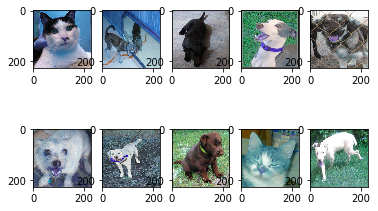

In [13]:
plt.subplot(2,5,1)
plt.imshow(batch_x[0])
plt.subplot(2,5,2)
plt.imshow(batch_x[1])
plt.subplot(2,5,3)
plt.imshow(batch_x[2])
plt.subplot(2,5,4)
plt.imshow(batch_x[3])
plt.subplot(2,5,5)
plt.imshow(batch_x[4])
plt.subplot(2,5,6)
plt.imshow(batch_x[5])
plt.subplot(2,5,7)
plt.imshow(batch_x[6])
plt.subplot(2,5,8)
plt.imshow(batch_x[7])
plt.subplot(2,5,9)
plt.imshow(batch_x[8])
plt.subplot(2,5,10)
plt.imshow(batch_x[9])

# Insights

For this one I had lots of issues with just getting it to run. I got it to run for one epoch and print out the test accuracy, but when trying to run it for more epochs it just struggled so much. It kept losing connection with something! I don't know. But, it is working a lot faster on google cloud than just on my computer. It seemed like it would take hours if I left it to my computer to even compute one epoch whereas we get that it takes 166 seconds to do one epoch.